In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

# Pandas library is used for importing various file types e.g. csv, excel, json.
# also used for manipulation and cleaning dataframes.

# Numpy library has functions used for working with arrays and matrices
# faster, clearer and better quality code using Numpy

# Statsmodels is a module that provides classes and functions for the estimation of statistical models
# as well as for conducting statistical tests and statistical data exploration

# Matplotlib is a 2D plotting library for visualising data in Python

# Seaborn is used for improving Matplotlib visualisations to make them more visually attractive.
# It builds on top of MatPlotLib and works with Pandas for data structures

In [2]:
data = pd.read_csv('Salary_Data.csv')

# importing the data
# data from https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression

## Hypothesis - On average, the more work experience a person has,
## the higher their salary will be

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
y = data['YearsExperience']
x1 = data['Salary']

# storing the independant variable (Salary) in the variable x and the dependant variable (Years Experience) in the variable y

## Scattergraph - Plotting Years XP to Salary

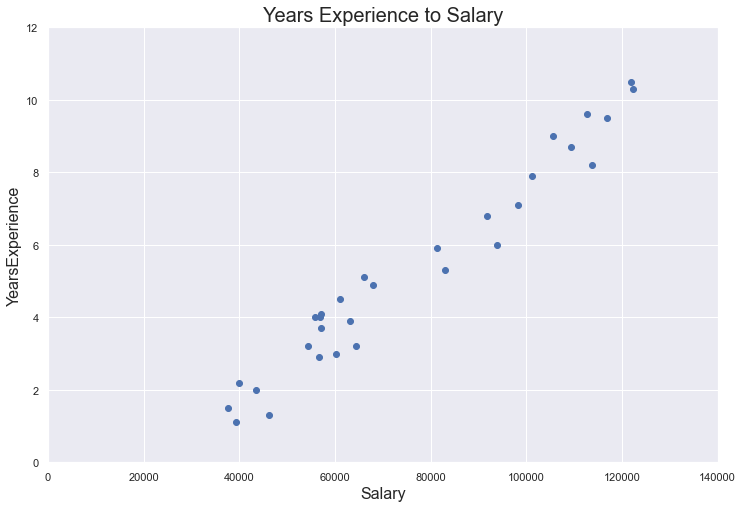

In [22]:
plt.figure(figsize = (12, 8))

plt.scatter(x1,y)
plt.xlim(0, 140000)
plt.ylim(0, 12)
plt.xlabel('Salary', fontsize=16)
plt.ylabel('YearsExperience', fontsize=16)
plt.title('Years Experience to Salary', fontsize=20)
plt.show()

# plotting the graph

## Regression

In [7]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

# using the method 'add_constant' to the independant variable (Salary)
# 'results' contain the outcome of the Ordinary Least Squares Regression (OLS)
# last line displays the regression results in a summary table

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           1.14e-20
Time:                        14:52:44   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plotting Regression on Scatterplot

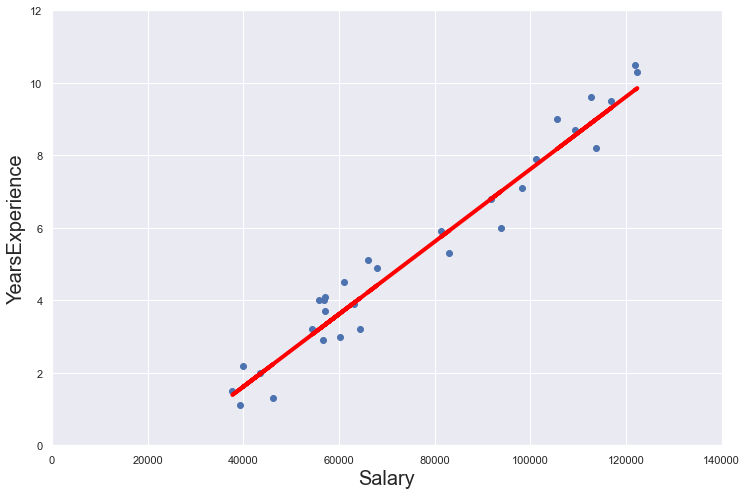

In [23]:
plt.figure(figsize = (12, 8))
plt.scatter(x1,y)
plt.xlim(0, 140000)
plt.ylim(0, 12)
yhat = 0.0001*x1 + -2.3832
fig = plt.plot(x1, yhat, lw=4, c='red', label = 'regression line')
plt.xlabel('Salary', fontsize=20)
plt.ylabel('YearsExperience', fontsize=20)
plt.show()

# this codes the scatterplot with the line of best fit running through it (orange)
# the line of best fit is the line which is closest to all observations simultaneously
# as the regression results show, the first coefficient is -2.3832, the second is 0.0001
# therefore Years Experience = -2.3832 + 0.0001 * Salary score
# the yhat is the regression line = 0.275 + 0.0017*x1
# this is the regression equation

### As the P-value is below 0.05(5%) we can reject the null hypothesis
### Therefore, work experience is a good predictor of a person's salary